In [142]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

## Input URL

In [143]:
#paste your url and the type 0 for first batted team or type 2 for second batted team
# if team is batted 2nd inning:  url = [('url', 2)]
#you can include anynumber of URLs

url = [('https://www.espncricinfo.com/series/men-s-t20-asia-cup-2022-1327237/afghanistan-vs-sri-lanka-1st-match-group-b-1327269/full-scorecard',0),
      ('https://www.espncricinfo.com/series/men-s-t20-asia-cup-2022-1327237/bangladesh-vs-sri-lanka-5th-match-group-b-1327273/full-scorecard',2),
      ('https://www.espncricinfo.com/series/men-s-t20-asia-cup-2022-1327237/afghanistan-vs-sri-lanka-7th-match-super-four-1327275/full-scorecard',2),('https://www.espncricinfo.com/series/men-s-t20-asia-cup-2022-1327237/india-vs-sri-lanka-9th-match-super-four-1327277/full-scorecard',2),('https://www.espncricinfo.com/series/men-s-t20-asia-cup-2022-1327237/pakistan-vs-sri-lanka-12th-match-super-four-1327280/full-scorecard',2),('https://www.espncricinfo.com/series/men-s-t20-asia-cup-2022-1327237/pakistan-vs-sri-lanka-final-1327281/full-scorecard',0)]

In [144]:
j = 0
for i in url:
    j += 1
    page = requests.get(i[0])

    soup = BeautifulSoup(page.text, 'html')
    
    t1 = soup.find_all('table')[i[1]]
    
    th = t1.find_all('th')
    
    head = [th.text.strip() for th in th]
    
    head[1] = 'Description'
    
    temp_df = pd.DataFrame(columns = head)
      
    
    data = t1.find('tbody')
    match_numbers = []
    
    batmans_data = data.find_all('tr', class_ = lambda x: x not in ['ds-hidden', 'ds-border-b-0','!ds-border-b-0','ds-text-tight-s'])
    
    for row in batmans_data[:-2]:
        row_data = row.find_all('td')
        individual_row_data = [data.text.strip() for data in row_data]
        print(individual_row_data)
        temp_df.loc[len(temp_df)] = individual_row_data
        match_numbers.append(j)
        
    temp_df['Match_Number'] = match_numbers
    # Append the data from the temporary DataFrame to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

['Pathum Nissanka', 'c †Rahmanullah Gurbaz b Naveen-ul-Haq', '3', '7', '17', '0', '0', '42.85']
['Kusal Mendis\xa0†', 'lbw b Fazalhaq Farooqi', '2', '4', '7', '0', '0', '50.00']
['Charith Asalanka', 'lbw b Fazalhaq Farooqi', '0', '1', '2', '0', '0', '0.00']
['Danushka Gunathilaka', 'c Karim Janat b Mujeeb Ur Rahman', '17', '17', '38', '3', '0', '100.00']
['Bhanuka Rajapaksa', 'run out (Mohammad Nabi)', '38', '29', '54', '5', '1', '131.03']
['Wanindu Hasaranga', 'c Mohammad Nabi b Mujeeb Ur Rahman', '2', '8', '10', '0', '0', '25.00']
['Dasun Shanaka\xa0(c)', 'c †Rahmanullah Gurbaz b Mohammad Nabi', '0', '1', '6', '0', '0', '0.00']
['Chamika Karunaratne', 'b Fazalhaq Farooqi', '31', '38', '45', '3', '1', '81.57']
['Maheesh Theekshana', 'run out (Azmatullah Omarzai/†Rahmanullah Gurbaz)', '0', '0', '3', '0', '0', '-']
['Matheesha Pathirana', 'c Najibullah Zadran b Mohammad Nabi', '5', '12', '10', '0', '0', '41.66']
['Dilshan Madushanka', 'not out', '1', '2', '23', '0', '0', '50.00']
['Path

In [145]:
df

,BATTING,Description,R,B,M,4s,6s,SR,Match_Number
0,Pathum Nissanka,c †Rahmanullah Gurbaz b Naveen-ul-Haq,3,7,17,0,0,42.85,1.0
1,Kusal Mendis †,lbw b Fazalhaq Farooqi,2,4,7,0,0,50.00,1.0
2,Charith Asalanka,lbw b Fazalhaq Farooqi,0,1,2,0,0,0.00,1.0
3,Danushka Gunathilaka,c Karim Janat b Mujeeb Ur Rahman,17,17,38,3,0,100.00,1.0
4,Bhanuka Rajapaksa,run out (Mohammad Nabi),38,29,54,5,1,131.03,1.0
5,Wanindu Hasaranga,c Mohammad Nabi b Mujeeb Ur Rahman,2,8,10,0,0,25.00,1.0
6,Dasun Shanaka (c),c †Rahmanullah Gurbaz b Mohammad Nabi,0,1,6,0,0,0.00,1.0
7,Chamika Karunaratne,b Fazalhaq Farooqi,31,38,45,3,1,81.57,1.0
8,Maheesh Theekshana,run out (Azmatullah Omarzai/†Rahmanullah Gurbaz),0,0,3,0,0,-,1.0
9,Matheesha Pathirana,c Najibullah Zadran b Mohammad Nabi,5,12,10,0,0,41.66,1.0


In [134]:
# df.drop(df.index, inplace=True)

In [135]:
# df
# columns_to_drop = ['Match Number', 'BOWLING', 'W', 'ECON', '0s', 'WD', 'NB']
# df.drop(columns=columns_to_drop, inplace=True)

In [153]:
df['SR'] = df['SR'].replace('-', 0)

In [154]:
df

,BATTING,Description,R,B,M,4s,6s,SR,Match_Number
0,Pathum Nissanka,c †Rahmanullah Gurbaz b Naveen-ul-Haq,3,7,17,0,0,42.85,1.0
1,Kusal Mendis †,lbw b Fazalhaq Farooqi,2,4,7,0,0,50.00,1.0
2,Charith Asalanka,lbw b Fazalhaq Farooqi,0,1,2,0,0,0.00,1.0
3,Danushka Gunathilaka,c Karim Janat b Mujeeb Ur Rahman,17,17,38,3,0,100.00,1.0
4,Bhanuka Rajapaksa,run out (Mohammad Nabi),38,29,54,5,1,131.03,1.0
5,Wanindu Hasaranga,c Mohammad Nabi b Mujeeb Ur Rahman,2,8,10,0,0,25.00,1.0
6,Dasun Shanaka (c),c †Rahmanullah Gurbaz b Mohammad Nabi,0,1,6,0,0,0.00,1.0
7,Chamika Karunaratne,b Fazalhaq Farooqi,31,38,45,3,1,81.57,1.0
8,Maheesh Theekshana,run out (Azmatullah Omarzai/†Rahmanullah Gurbaz),0,0,3,0,0,0,1.0
9,Matheesha Pathirana,c Najibullah Zadran b Mohammad Nabi,5,12,10,0,0,41.66,1.0


### Runs by Players

In [160]:
df['R'] = df['R'].astype(int)
df['B'] = df['B'].astype(int)
df['6s'] = df['6s'].astype(int)
df['4s'] = df['4s'].astype(int)
df['SR'] = df['SR'].astype(float)
df['BATTING'] = df['BATTING'].str.split().str[:2].str.join(' ')


In [161]:
runs = df.groupby('BATTING')['R'].sum() #total runs by players


In [162]:
runs

BATTING
Asitha Fernando          10
Bhanuka Rajapaksa       191
Chamika Karunaratne      66
Charith Asalanka          9
Danushka Gunathilaka     63
Dasun Shanaka           111
Dhananjaya de            37
Dilshan Madushanka        1
Kusal Mendis            155
Maheesh Theekshana        0
Matheesha Pathirana       5
Pathum Nissanka         173
Wanindu Hasaranga        66
Name: R, dtype: int32

In [163]:
df.shape

(50, 9)

In [164]:
df

,BATTING,Description,R,B,M,4s,6s,SR,Match_Number
0,Pathum Nissanka,c †Rahmanullah Gurbaz b Naveen-ul-Haq,3,7,17,0,0,42.85,1.0
1,Kusal Mendis,lbw b Fazalhaq Farooqi,2,4,7,0,0,50.00,1.0
2,Charith Asalanka,lbw b Fazalhaq Farooqi,0,1,2,0,0,0.00,1.0
3,Danushka Gunathilaka,c Karim Janat b Mujeeb Ur Rahman,17,17,38,3,0,100.00,1.0
4,Bhanuka Rajapaksa,run out (Mohammad Nabi),38,29,54,5,1,131.03,1.0
5,Wanindu Hasaranga,c Mohammad Nabi b Mujeeb Ur Rahman,2,8,10,0,0,25.00,1.0
6,Dasun Shanaka,c †Rahmanullah Gurbaz b Mohammad Nabi,0,1,6,0,0,0.00,1.0
7,Chamika Karunaratne,b Fazalhaq Farooqi,31,38,45,3,1,81.57,1.0
8,Maheesh Theekshana,run out (Azmatullah Omarzai/†Rahmanullah Gurbaz),0,0,3,0,0,0.00,1.0
9,Matheesha Pathirana,c Najibullah Zadran b Mohammad Nabi,5,12,10,0,0,41.66,1.0


In [172]:
df.to_csv('Asia Cup SL batting.csv', index=False)

In [173]:
import matplotlib.pyplot as plt

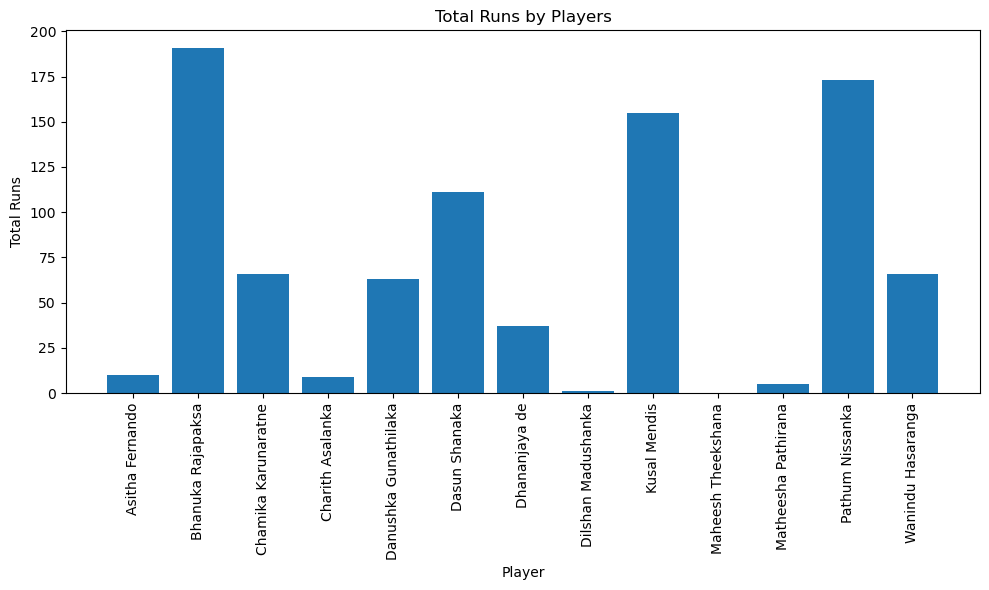

In [174]:
plt.figure(figsize=(10, 6))
plt.bar(runs.index, runs.values)
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.title('Total Runs by Players')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()